In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)





In [6]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
# read csv files with pandas
brands = pd.read_csv("/brands.csv")
categories = pd.read_csv("/categories.csv")
customers = pd.read_csv("/customers.csv")
order_items = pd.read_csv("/order_items.csv")
orders = pd.read_csv("/orders.csv")
products = pd.read_csv("/products.csv")
staffs = pd.read_csv("/staffs.csv")
stocks = pd.read_csv("/stocks.csv")
stores = pd.read_csv("/stores.csv")

In [8]:
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [9]:
db = sql.connect('bike_store.db')

In [10]:
brands.to_sql("brands",db,if_exists = "replace", index = False)

9

In [11]:
q1 = """SELECT * FROM brands;"""

df1 = pd.read_sql_query(q1, db)
df1

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [12]:
print("number of rows in brands: " + str(brands.to_sql('brands', db , if_exists = 'replace', index=False)))
print("number of rows in categories: " + str(categories.to_sql('categories', db , if_exists = 'replace', index=False)))
print("number of rows in customers: " + str(customers.to_sql('customers', db , if_exists = 'replace', index=False)))
print("number of rows in order_items: " + str(order_items.to_sql('order_items', db , if_exists = 'replace', index=False)))
print("number of rows in orders: " + str(orders.to_sql('orders', db , if_exists = 'replace', index=False)))
print("number of rows in products: " + str(products.to_sql('products', db , if_exists = 'replace', index=False)))
print("number of rows in staffs: " + str(staffs.to_sql('staffs', db , if_exists = 'replace', index=False)))
print("number of rows in stocks: " + str(stocks.to_sql('stocks', db , if_exists = 'replace', index=False)))
print("number of rows in stores: " + str(stores.to_sql('stores', db , if_exists = 'replace', index=False)))


number of rows in brands: 9
number of rows in categories: 7
number of rows in customers: 1445
number of rows in order_items: 4722
number of rows in orders: 1615
number of rows in products: 321
number of rows in staffs: 10
number of rows in stocks: 939
number of rows in stores: 3


![image.png](attachment:cd590b63-5cdc-4ef7-b96c-d1b21087f3d3.png)![image.png](attachment:9eb01179-eced-4291-96d4-5f442576abfb.png)

Analysis

1) Number of stocks based on category name and store name

In [13]:
test_query = """

Select *
from categories;
"""

res = pd.read_sql_query(test_query, db)
res

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [14]:
query_test = """

Select *
from products;
"""

res = pd.read_sql_query(query_test, db)
res

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [15]:
q = """

Select st.store_name, c.category_name, SUM (s.quantity) as sum_qty
from categories c
JOIN
products p ON c.category_id = p.category_id
JOIN
stocks s on p.product_id = s.product_id
JOIN stores st ON st.store_id = s.store_id

GROUP BY st.store_name, c.category_name
ORDER BY st.store_name, c.category_name;
"""

res = pd.read_sql_query(q, db)
res

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


In [16]:
res.dtypes

,0
store_name,object
category_name,object
sum_qty,int64


In [17]:
store = res["store_name"].unique()

res['store_name'] = pd.Categorical(res["store_name"], categories = store, ordered = True)

In [18]:
category = res["category_name"].unique()

res['category_name'] = pd.Categorical(res["category_name"], categories = category, ordered = True)

/tmp/ipython-input-2756057890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = res.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)


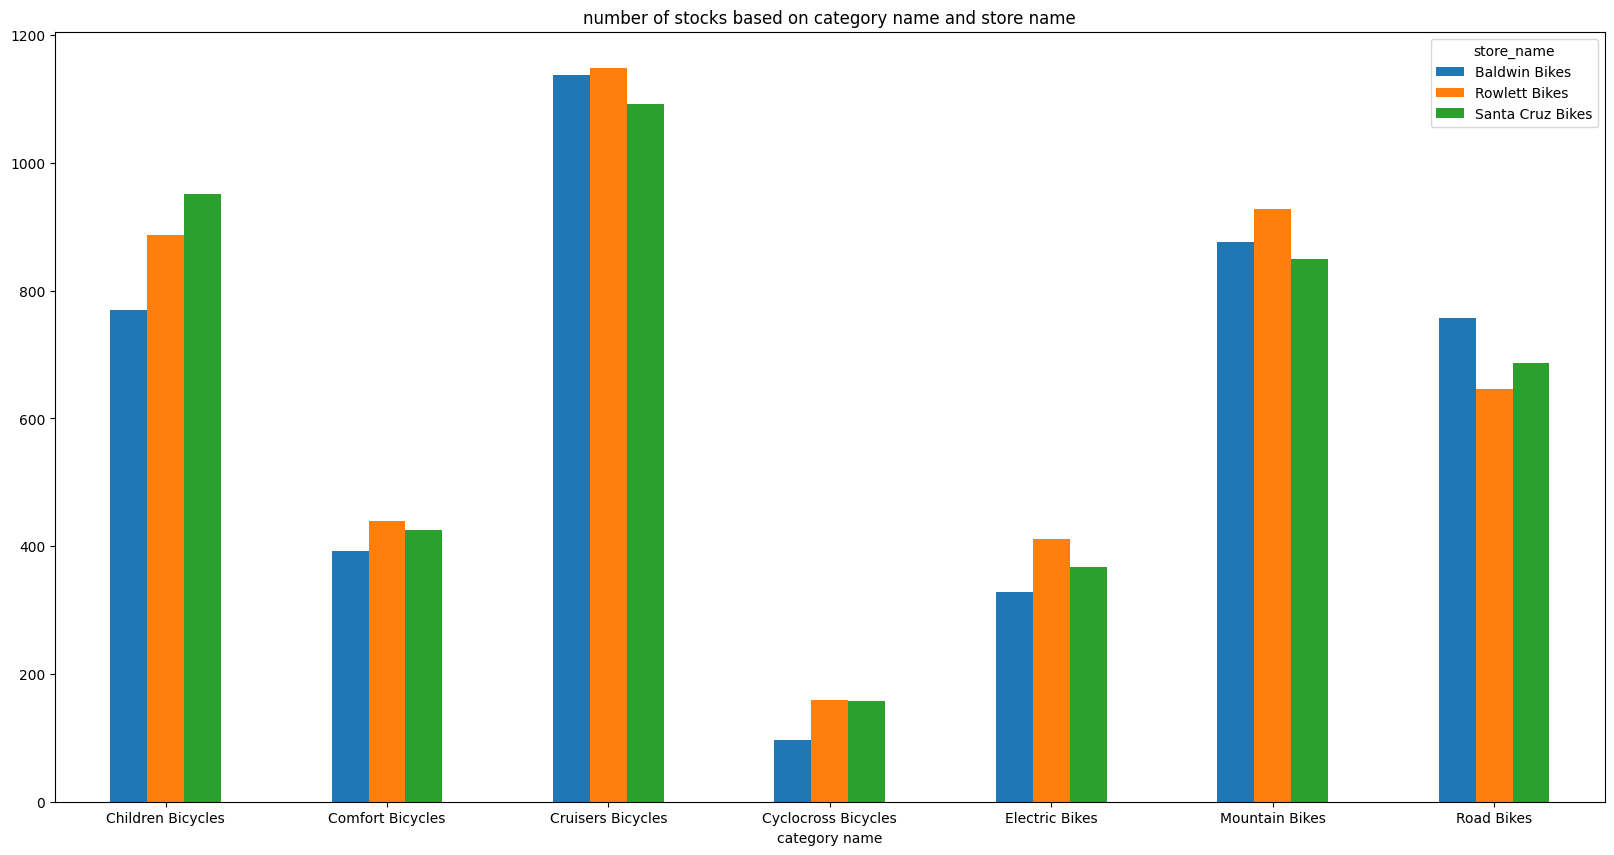

In [19]:
res = res.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)

ax = res.plot(kind = 'bar', figsize = (20,10))
plt.title('number of stocks based on category name and store name')
plt.xlabel('category name')
plt.xticks(rotation = 0)

plt.show()

In [20]:
res.to_sql("res",db)

7

In [21]:
tq = """Select * from res"""

res2 = pd.read_sql_query(tq,db)
res2

,category_name,Baldwin Bikes,Rowlett Bikes,Santa Cruz Bikes
0,Children Bicycles,769,887,952
1,Comfort Bicycles,393,440,425
2,Cruisers Bicycles,1137,1148,1093
3,Cyclocross Bicycles,97,159,158
4,Electric Bikes,328,412,368
5,Mountain Bikes,877,928,849
6,Road Bikes,758,646,687
